In [18]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
def linear(x,m,c):
    return m*x+c

In [20]:
def find_rms(data):
    return np.sqrt(np.mean(data, axis=1)**2).flatten()

In [21]:
P2H= np.loadtxt('../Data/P2H_rms_raw_data.txt')
P2H= np.loadtxt('../Data/P2H_rms_raw_data.txt')

In [22]:
P2H_long= np.loadtxt('../Data/P2H_rms_raw_data_long.txt')
P2H_long= np.loadtxt('../Data/P2H_rms_raw_data_long.txt')

In [23]:
P2H_timeav, P2H_x,P2H_errtime= (P2H[0].reshape(7,20), P2H[1].reshape(7,20), P2H[2].reshape(7,20))
P2H_timeav, P2H_x,P2H_errtime= (P2H[0].reshape(7,20), P2H[1].reshape(7,20), P2H[2].reshape(7,20))

In [24]:
P2H_timeav_long, P2H_x_long,P2H_errtime_long= (P2H_long[0].reshape(7,20), P2H_long[1].reshape(7,20), P2H_long[2].reshape(7,20))
P2H_timeav_long, P2H_x_long,P2H_errtime_long= (P2H_long[0].reshape(7,20), P2H_long[1].reshape(7,20), P2H_long[2].reshape(7,20))

In [25]:
P2H_rms= find_rms(P2H_timeav)
P2H_xaxis_rms= P2H_x.T[0]

P2H_rms= find_rms(P2H_timeav)
P2H_xaxis_rms= P2H_x.T[0]

In [26]:
P2H_rms_long= find_rms(P2H_timeav_long)
P2H_xaxis_rms_long= P2H_x_long.T[0]

P2H_rms_long= find_rms(P2H_timeav_long)
P2H_xaxis_rms_long= P2H_x_long.T[0]

The pearson statistic for long is 0.871 with a p value of 0.00104
The linear regression for long returns a slope of 0.000649 *- 0.00012953553618342778 and a intercept of 1.25 +- 0.13407084437956304
The pearson statistic for long is 0.871 with a p value of 0.00104


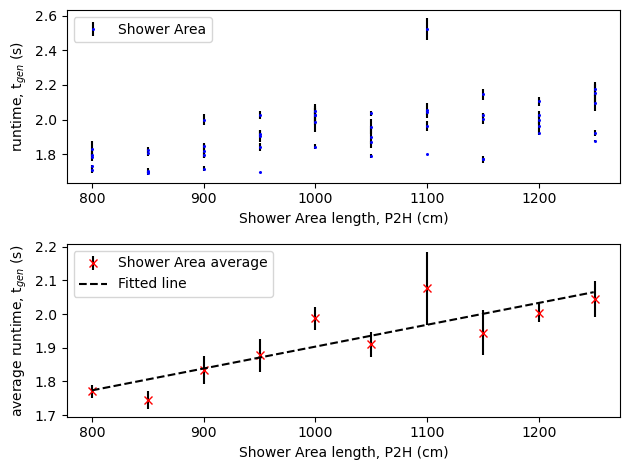

In [27]:
gen_long= np.loadtxt('../Data/SA_gen_long_raw_data.txt')
# gen_short= np.loadtxt('../Data/P2H_gen_short_raw_data.txt')

gen_timeav_long, gen_x_long,gen_errtime_long= (gen_long[0].reshape(10,5), gen_long[1].reshape(10,5), gen_long[2].reshape(10,5))
# gen_timeav_short, gen_x_short,gen_errtime_short= (gen_short[0].reshape(14,10), gen_short[1].reshape(14,10), gen_short[2].reshape(14,10))

gen_errtime_long[np.where(gen_timeav_long<1.5)] = 0
gen_timeav_long[gen_timeav_long<1.5] = 1.8

reg= stats.linregress(np.average(gen_x_long, axis= 1).flatten(), np.average(gen_timeav_long, axis=1).flatten())
print(f'The pearson statistic for long is {reg.rvalue:.3} with a p value of {reg.pvalue:.3}')
print(f'The linear regression for long returns a slope of {reg.slope:.3} *- {reg.stderr} and a intercept of {reg.intercept:.3} +- {reg.intercept_stderr}')

fig, (ax1,ax2)=plt.subplots(2,1)
ax1.errorbar(gen_x_long.flatten(), gen_timeav_long.flatten(), yerr=gen_errtime_long.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label='Shower Area')
# ax1.set_ylim((1.5,2.3))
ax1.legend(loc='upper left')
ax1.set_xlabel('Shower Area length, P2H (cm)')
ax1.set_ylabel(r'runtime, t$_{gen}$ (s)')

ax2.errorbar(np.average(gen_x_long, axis= 1).flatten(), np.average(gen_timeav_long, axis=1),yerr= np.std(gen_timeav_long, axis=1)/np.sqrt(gen_timeav_long.shape[1]),fmt= 'rx', ecolor='k', markersize= 6, label= 'Shower Area average')
ax2.errorbar(np.arange(gen_x_long[0][0], gen_x_long[-1][0]), linear(np.arange(gen_x_long[0][0], gen_x_long[-1][0]), reg.slope, reg.intercept),fmt='k--', label= 'Fitted line')
ax2.legend(loc='upper left')
ax2.set_xlabel('Shower Area length, P2H (cm)')
ax2.set_ylabel(r'average runtime, t$_{gen}$ (s)')
# ax1.set_title('Event runtime vs Shower Area size for cosmic generation', y=1.05)
fig.tight_layout()


corr_long= stats.pearsonr(np.average(gen_timeav_long, axis=1).flatten(), np.average(gen_x_long, axis= 1).flatten())
print(f'The pearson statistic for long is {corr_long.statistic:.3} with a p value of {corr_long.pvalue:.3}')

Chi squared is 15.24004125671722


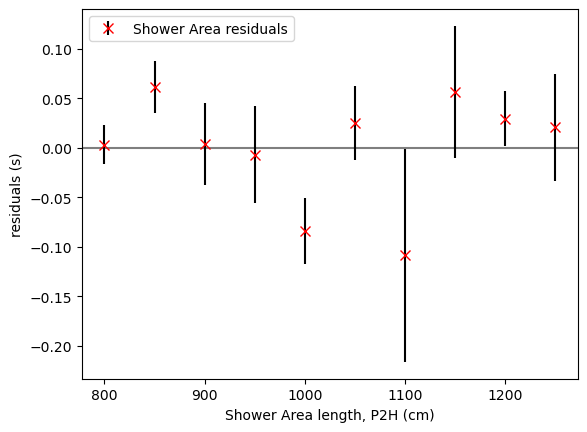

In [28]:
x= gen_x_long[:,1]
residual= linear(x, reg.slope, reg.intercept)- np.average(gen_timeav_long, axis=1)
residual_err= np.std(gen_timeav_long, axis=1)/np.sqrt(gen_timeav_long.shape[1])
chi_2= (residual[:]**2/residual_err[:]**2).sum()
print(f'Chi squared is {chi_2}')

plt.errorbar(x, residual, yerr=residual_err, fmt= 'rx', ecolor='k', markersize= 7, label= 'Shower Area residuals')
plt.legend(loc='upper left')
plt.xlabel('Shower Area length, P2H (cm)')
plt.ylabel(r'residuals (s)')
plt.axhline(c='k', alpha=0.5)
# plt.title('Residuals of event runtime vs Shower Area size for cosmic generation', y=1.05)

The pearson statistic for long is -0.0584 with a p value of 0.873
The linear regression for long returns a slope of -0.00116 *- 0.007012764423586387 and a intercept of 63.3 +- 7.258295873140274


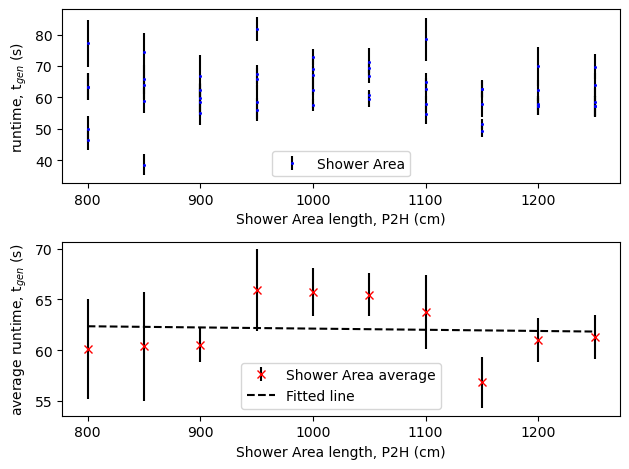

In [33]:
g4_long= np.loadtxt('../Data/SA_g4_long_raw_data.txt')
# g4_short= np.loadtxt('../Data/P2H_g4_short_raw_data.txt')

g4_timeav_long, g4_x_long,g4_errtime_long= (g4_long[0].reshape(10,5), g4_long[1].reshape(10,5), g4_long[2].reshape(10,5))
# g4_timeav_short, g4_x_short,g4_errtime_short= (g4_short[0].reshape(14,10), g4_short[1].reshape(14,10), g4_short[2].reshape(14,10))

reg= stats.linregress(np.average(g4_x_long, axis= 1).flatten(), np.average(g4_timeav_long, axis=1).flatten())
print(f'The pearson statistic for long is {reg.rvalue:.3} with a p value of {reg.pvalue:.3}')
print(f'The linear regression for long returns a slope of {reg.slope:.3} *- {reg.stderr} and a intercept of {reg.intercept:.3} +- {reg.intercept_stderr}')
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.errorbar(g4_x_long.flatten(), g4_timeav_long.flatten(), yerr=g4_errtime_long.flatten(), fmt='bx', ecolor='k', markersize= 1.5, label='Shower Area')
# ax1.set_ylim((1.5,2.3))
ax1.legend(loc='lower center')
ax1.set_xlabel('Shower Area length, P2H (cm)')
ax1.set_ylabel(r'runtime, t$_{gen}$ (s)')

ax2.errorbar(np.average(g4_x_long, axis= 1).flatten(), np.average(g4_timeav_long, axis=1),yerr= np.std(g4_timeav_long, axis=1)/np.sqrt(g4_timeav_long.shape[1]),fmt= 'rx', ecolor='k', markersize= 6, label= 'Shower Area average')
ax2.set_xlabel('Shower Area length, P2H (cm)')
ax2.set_ylabel(r'average runtime, t$_{gen}$ (s)')
ax2.errorbar(np.arange(g4_x_long[0][0], g4_x_long[-1][0]), linear(np.arange(g4_x_long[0][0], g4_x_long[-1][0]), reg.slope, reg.intercept),fmt='k--', label= 'Fitted line')
ax2.legend(loc='lower center')
# ax1.set_title('Event runtime vs Shower Area size for geant4 simulation', y=1.05)
fig.tight_layout()


Chi squared is 11.9021120005424


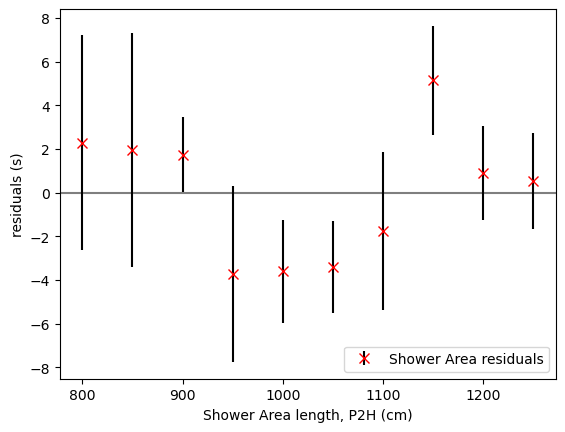

In [34]:
x= g4_x_long[:,1]
residual= linear(x, reg.slope, reg.intercept)- np.average(g4_timeav_long, axis=1)
residual_err= np.std(g4_timeav_long, axis=1)/np.sqrt(g4_timeav_long.shape[1])
chi_2= (residual[:]**2/residual_err[:]**2).sum()
print(f'Chi squared is {chi_2}')

plt.errorbar(x, residual, yerr=residual_err, fmt= 'rx', ecolor='k', markersize= 7, label= 'Shower Area residuals')
plt.legend(loc='lower right')
plt.xlabel('Shower Area length, P2H (cm)')
plt.ylabel(r'residuals (s)')
plt.axhline(c='k', alpha=0.5)
# plt.title('Residuals of event runtime vs Shower Area size for geant4 simulation', y=1.05)

The pearson statistic for long is 0.484 with a p value of 0.187
The linear regression for long returns a slope of 0.000888 *- 0.000606753002535291 and a intercept of 23.1 +- 0.6117883835012049


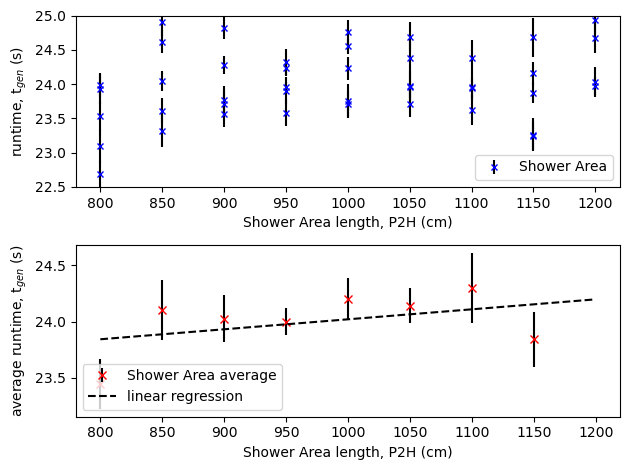

In [35]:
det_long= np.loadtxt('../Data/SA_det_long_raw_data.txt')
# det_short= np.loadtxt('../Data/P2H_det_short_raw_data.txt')

det_timeav_long, det_x_long,det_errtime_long= (det_long[0].reshape(9,5), det_long[1].reshape(9,5), det_long[2].reshape(9,5))
# det_timeav_short, det_x_short,det_errtime_short= (det_short[0].reshape(14,10), det_short[1].reshape(14,10), det_short[2].reshape(14,10))

det_errtime_long[np.where(det_timeav_long>30)] = 0
det_timeav_long[det_timeav_long>30] = 20

reg= stats.linregress(np.average(det_x_long, axis= 1).flatten(), np.average(det_timeav_long, axis=1).flatten())
print(f'The pearson statistic for long is {reg.rvalue:.3} with a p value of {reg.pvalue:.3}')
print(f'The linear regression for long returns a slope of {reg.slope:.3} *- {reg.stderr} and a intercept of {reg.intercept:.3} +- {reg.intercept_stderr}')
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.errorbar(det_x_long.flatten()[:-1], det_timeav_long.flatten()[:-1], yerr=det_errtime_long.flatten()[:-1], fmt='bx', ecolor='k', markersize= 5, label='Shower Area')
ax1.set_ylim((22.5,25))
ax1.legend(loc='lower right')
ax1.set_xlabel('Shower Area length, P2H (cm)')
ax1.set_ylabel(r'runtime, t$_{gen}$ (s)')

ax2.errorbar(np.average(det_x_long, axis= 1).flatten()[:-1], np.average(det_timeav_long, axis=1)[:-1],yerr= (np.std(det_timeav_long, axis=1)/np.sqrt(det_timeav_long.shape[1]))[:-1],fmt= 'rx', ecolor='k', markersize= 6, label= 'Shower Area average')
ax2.set_xlabel('Shower Area length, P2H (cm)')
ax2.set_ylabel(r'average runtime, t$_{gen}$ (s)')
ax2.errorbar(np.arange(det_x_long[0][0], det_x_long[-1][0]), linear(np.arange(det_x_long[0][0], det_x_long[-1][0]), reg.slope, reg.intercept),fmt='k--', label= 'linear regression')
ax2.legend(loc='lower left')
# ax1.set_title('Event runtime vs Shower Area size for detector simulation', y=1.05)
fig.tight_layout()

Chi squared is 7.293303832714093


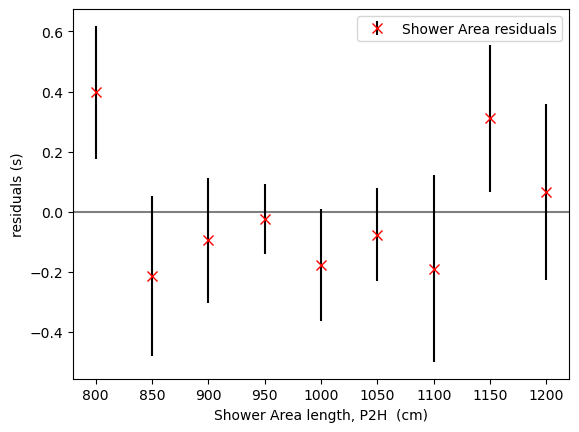

In [36]:
x= det_x_long[:,1]
residual= linear(x, reg.slope, reg.intercept)- np.average(det_timeav_long, axis=1)
residual_err= np.std(det_timeav_long, axis=1)/np.sqrt(det_timeav_long.shape[1])
chi_2= (residual**2/residual_err**2).sum()
print(f'Chi squared is {chi_2}')

plt.errorbar(x, residual, yerr=residual_err, fmt= 'rx', ecolor='k', markersize= 7, label= 'Shower Area residuals')
plt.legend(loc='upper right')
plt.xlabel('Shower Area length, P2H  (cm)')
plt.ylabel(r'residuals (s)')
plt.axhline(c='k', alpha=0.5)
# plt.title('Residuals of event runtime vs Shower Area size for detector simulation', y=1.05)